#  Statistical Hypothesis Testing

## **Introduction**
This projetc explores four fundamental statistical tests through practical problem-solving scenarios. You'll analyze relationships between categorical variables, compare group means, and evaluate teaching method effectiveness using appropriate statistical methods.

## **Objective**
By completing this lab, you will:
1. Identify the correct statistical test for different research scenarios
2. Formulate null and alternative hypotheses
3. Execute tests using Python's SciPy library
4. Interpret p-values and effect sizes
5. Visualize results for better communication

## **Tests Covered**
- Chi-square test of independence
- One-sample t-test
- Independent two-sample t-test
- One-way ANOVA with post-hoc tests

## **Dataset Overview**
All problems use synthetic datasets representing:
- Smartphone brand preferences by gender
- Website response times
- Student scores under different teaching methods




##1. Statement:
Investigate whether there is a relationship between gender (Male/Female) and smartphone brand preference (Samsung, Apple, Other) among a sample of users. Conduct a test to determine if there is a significant association between gender and smartphone brand preference.

In [ ]:
# Import libraries
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd


In [ ]:
# Data
observed_data = np.array([[30, 20, 15], [25, 35, 10]])  # Example frequencies, rows represent gender, columns represent smartphone brand
observed_data

array([[30, 20, 15],
       [25, 35, 10]])

In [ ]:
# Data
import pandas as pd
import numpy as np

observed_data = np.array([[30, 20, 15], [25, 35, 10]])

# Convert the array to a DataFrame
df = pd.DataFrame(observed_data, index=['Male', 'Female'], columns=['Brand A', 'Brand B', 'Brand C'])

# Display the DataFrame as a table
print(df)

        Brand A  Brand B  Brand C
Male         30       20       15
Female       25       35       10


* chi2 test of independenceto to check whether there is a statistical significant association between 2 categorical variables.<BR>
1. IV - gender
2. DV - Brand preferences

H0: There is no relationship betweem gender and smartphone brands.<BR>
H1: There is some association between gender and brands.

In [ ]:
# chi2

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(observed_data)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p:.4f}")

Chi-square statistic: 5.368
p-value: 0.0683


There is no statistically significant association between gender and brand preference at the 5% level.

##2. Statement:
Analyze the average response time (continuous) of two versions of a website feature. Conduct a test to determine if the average response time of Version A is significantly different from the expected average response time.

In [ ]:
# Import libraries
import numpy as np
from scipy import stats

In [ ]:
# Data
response_times_version_a = np.array([0.25, 0.28, 0.24, 0.26, 0.27])
expected_average_time = 0.3  # hypothetical value

* One sample t-test to test if sample mean is statistically different from expected mean.<BR>

IV: <BR>
DV: Response time of version A (?IV: resp. time;  DV: average resp. time)<BR>
H0: μ = 0.3<BR>
H1: μ ≠ 0.3<BR>


In [ ]:
# assuming normality

t_stat, p_value = stats.ttest_1samp(response_times_version_a, popmean=expected_average_time)

# Output results
print(f"Mean response time: {response_times_version_a.mean():.4f} sec")
print(f"Expected mean: {expected_average_time} sec")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Mean response time: 0.2600 sec
Expected mean: 0.3 sec
t-statistic: -5.6569
p-value: 0.0048


There is strong evidence that the true mean response time of Version A differs from 0.3 seconds.

In [ ]:
# not sure if thats true effect

effect_size = (response_times_version_a.mean() - expected_average_time) / response_times_version_a.std()
print(f"Cohen's d: {effect_size:.3f}")

Cohen's d: -2.828


almost 3 std is large difference with small sample size may exaggerate the effect.

In [ ]:
# assuming non parametric

from scipy.stats import wilcoxon


stat, p_value = wilcoxon(response_times_version_a - expected_average_time)

print(f"Wilcoxon statistic: {stat}")
print(f"p-value: {p_value}")


Wilcoxon statistic: 0.0
p-value: 0.0625


##3.  Statement:
Two datasets representing the scores of two groups of students (Group A and Group B) who underwent different teaching methods. Perform a test to determine if there is a significant difference in the mean scores of the two groups.

In [ ]:
# Import libraries
import numpy as np
from scipy.stats import ttest_ind, levene
from scipy import stats

In [ ]:
# Data
group_a_scores = np.array([85, 88, 92, 78, 95, 89, 91])
group_b_scores = np.array([76, 80, 82, 79, 88, 85, 87])

Independent 2-sample t-test to check wether the mean scores of 2 groups are significantly different.<BR>

IV: Teaching methods <BR>
DV: student scores<BR>

H0: μA = μB<BR>
H1: μA ≠ μB

In [ ]:
print(stats.shapiro(group_a_scores))
print(stats.shapiro(group_b_scores))

ShapiroResult(statistic=np.float64(0.9409086860128948), pvalue=np.float64(0.6469179608370381))
ShapiroResult(statistic=np.float64(0.9557901203299246), pvalue=np.float64(0.7819089424946486))


In [ ]:


# Two-sample t-test
t_stat, p_value = ttest_ind(group_a_scores, group_b_scores, equal_var=equal_var)

print(f"Group A mean: {np.mean(group_a_scores):.2f}")
print(f"Group B mean: {np.mean(group_b_scores):.2f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Group A mean: 88.29
Group B mean: 82.43
t-statistic: 2.1874
p-value: 0.0492


In [ ]:
pooled_std = np.sqrt(((len(group_a_scores)-1)*group_a_scores.std(ddof=1)**2 +
                   ((len(group_b_scores)-1)*group_b_scores.std(ddof=1)**2) )/
                   (len(group_a_scores)+len(group_b_scores)-2))
d = (group_a_scores.mean() - group_b_scores.mean()) / pooled_std
print(f"Cohen's d = {d:.3f}")

Cohen's d = 1.169


<ipython-input-27-0d3579cde52d>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_a_scores, group_b_scores], labels=["Group A", "Group B"])


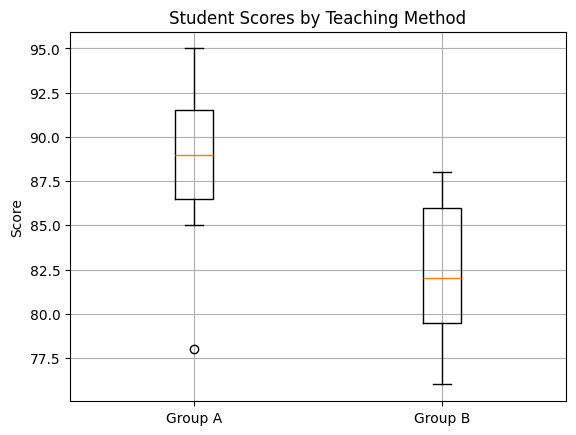

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([group_a_scores, group_b_scores], labels=["Group A", "Group B"])
plt.title("Student Scores by Teaching Method")
plt.ylabel("Score")
plt.grid(True)
plt.show()


##4. Statement:
There are test scores from three different teaching methods (Method A, Method B, Method C). Conduct a one-way ANOVA to determine if there is a significant difference in the mean scores among the three teaching methods.

In [ ]:
# Import libraries
import numpy as np
from scipy.stats import f_oneway
from scipy import stats

In [ ]:
# Data
method_a_scores = np.array([80, 85, 88, 82, 87])
method_b_scores = np.array([75, 78, 80, 72, 79])
method_c_scores = np.array([88, 92, 85, 90, 89])

In [ ]:
print(f"Method A normality p-value: {stats.shapiro(method_a_scores).pvalue:.4f}")
print(f"Method B normality p-value: {stats.shapiro(method_b_scores).pvalue:.4f}")
print(f"Method C normality p-value: {stats.shapiro(method_c_scores).pvalue:.4f}")

Method A normality p-value: 0.6774
Method B normality p-value: 0.5443
Method C normality p-value: 0.9546


In [ ]:
# Homogeneity of variance
print(f"Levene's test p-value: {stats.levene(method_a_scores, method_b_scores, method_c_scores).pvalue:.4f}")

Levene's test p-value: 0.7979


if P_value(0.7979) > 0.05 fail to reject N0 :Variances are equal across groups.

In [ ]:
# one way anova
f_stat, p_value = stats.f_oneway(method_a_scores, method_b_scores, method_c_scores)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.6f}")

F-statistic: 19.261, p-value: 0.000180


There is enough evidence to reject the null hypothesis and conclude that there is a significant difference in the mean scores among the three teaching methods.

In [ ]:
def eta_squared(ss_between, ss_total):
    return ss_between / ss_total

grand_mean = np.concatenate([method_a_scores, method_b_scores, method_c_scores]).mean()
ss_between = sum(len(group) * (group.mean() - grand_mean)**2 for group in [method_a_scores, method_b_scores, method_c_scores])
ss_total = sum((x - grand_mean)**2 for group in [method_a_scores, method_b_scores, method_c_scores] for x in group)

eta_sq = eta_squared(ss_between, ss_total)
print(f"Eta squared: {eta_sq:.3f}")

Eta squared: 0.762


teaching method has a very strong impact on test scores.

In [ ]:
# pairwise comparison

from statsmodels.stats.multicomp import pairwise_tukeyhsd

all_scores = np.concatenate([method_a_scores, method_b_scores, method_c_scores])
groups = np.array(['A']*5 + ['B']*5 + ['C']*5)

tukey = pairwise_tukeyhsd(all_scores, groups, alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -7.6 0.0057 -12.8188 -2.3812   True
     A      C      4.4 0.1028  -0.8188  9.6188  False
     B      C     12.0 0.0001   6.7812 17.2188   True
-----------------------------------------------------
